In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
#dataset
df = pd.read_csv(r"C:\Users\user\Downloads\archive (5).zip")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df['species'],categoris = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

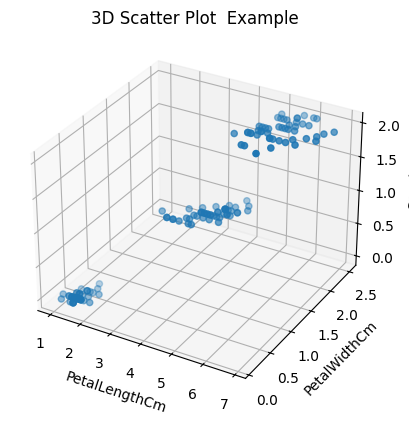

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df.petal_length, df.petal_width,df.species)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot  Example')
plt.show()

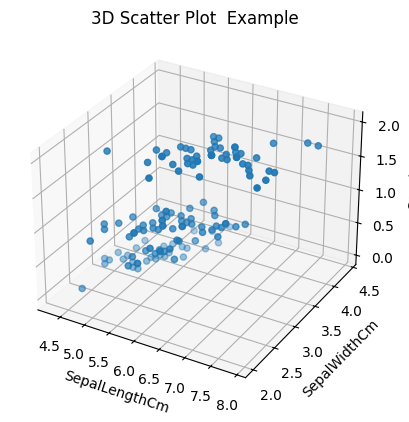

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df.sepal_length, df.sepal_width,df.species)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot  Example')
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

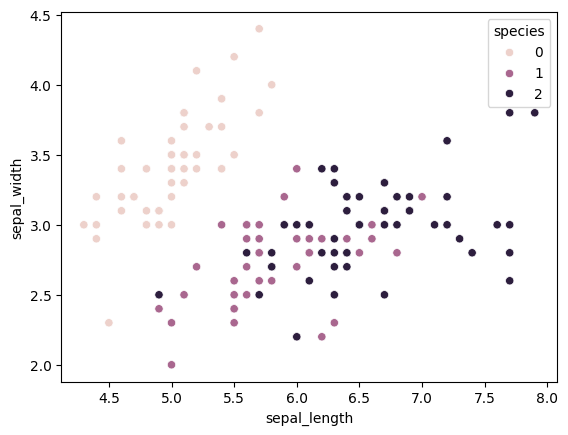

In [20]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")

<Axes: xlabel='petal_length', ylabel='petal_width'>

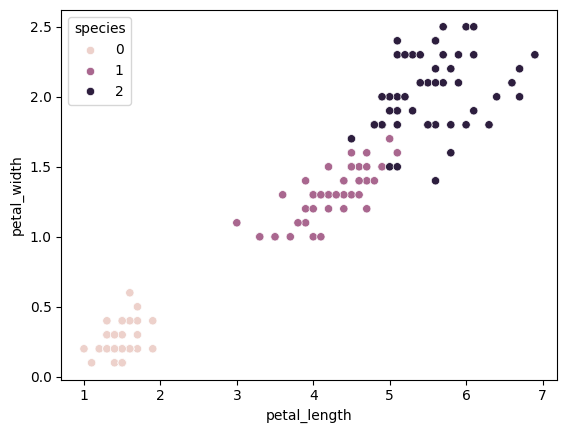

In [21]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")

In [24]:
#elbow technique
k_rng = range(1,10)
sse = []

for k in k_rng:
 km = KMeans(n_clusters =k)
 km.fit(df[['petal_length','petal_width']])
 sse.append(km.inertia_)

In [25]:
sse

[550.6434666666668,
 86.40394533571002,
 31.429285668276982,
 19.48238901098901,
 14.21070769230769,
 11.041545110250373,
 9.812415479876162,
 8.426042780748665,
 6.592938396386224]

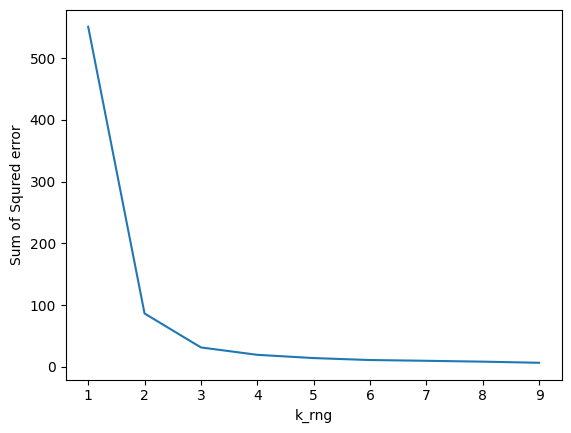

In [26]:
plt.xlabel('k_rng')
plt.ylabel('Sum of Squred error')
plt.plot(k_rng,sse) 

In [30]:
km = KMeans(n_clusters=3, random_state=0,)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [32]:
df['cluster']=y_predicted
df.head(120)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
115,6.4,3.2,5.3,2.3,2,2
116,6.5,3.0,5.5,1.8,2,2
117,7.7,3.8,6.7,2.2,2,2
118,7.7,2.6,6.9,2.3,2,2


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.species, df.cluster)

In [35]:
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]])

In [44]:
true_labels = df.species
predicted_labels = df.cluster
cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['setosa', 'versicolor', 'virginica']

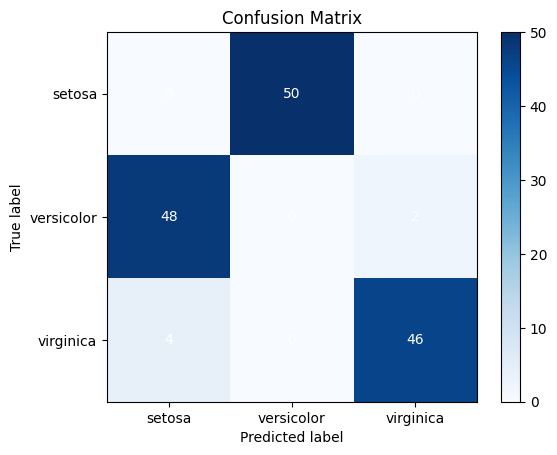

In [48]:
#plot confusion matrix
plt.imshow(cm, interpolation = 'nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

#fill matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j,i,str(cm[i][j]),ha='center', va='center', color='white')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()